비지도 학습 : 머신러닝의 미래
 - 입력데이터(X)만 존재, 출력(Y) 없음

In [1]:
#p 221 10개 숫자 이미지 OCR(Optical 광학 Character 글자 Recognizatio 인식)
# qlwlehgkrtmqdmfh tntwk dlstlrdmf gkf tn dlTtmqslek

In [4]:
#221
from sklearn.datasets import load_digits # digits 숫자

In [7]:
digits = load_digits()

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
digits.images.shape

(1797, 8, 8)

In [11]:
import matplotlib.pyplot as plt

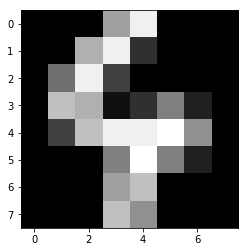

In [18]:
plt.imshow(digits.images[110],cmap='gray')

In [19]:
#221 64개의 명암값을 2개로 차원축소를 해서 2차원 그래프에 산점도로 그려봅니다

In [104]:
from sklearn.decomposition import PCA

In [105]:
import mglearn

In [106]:
pca = PCA(n_components=2).fit(digits.data) #64차원을 2차원으로 축소

In [107]:
pca_x=pca.transform(digits.data)
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

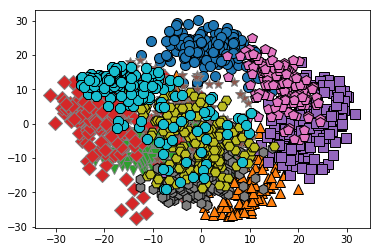

In [108]:
l = mglearn.discrete_scatter(pca_x[:,0],pca_x[:,1],digits.target)

In [42]:
#223
from sklearn.manifold import TSNE

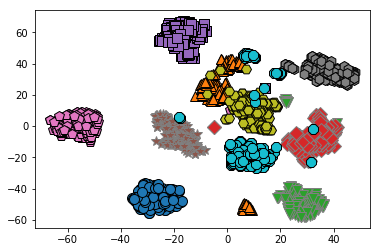

In [44]:
digits_tsne =TSNE().fit_transform(digits.data)
l = mglearn.discrete_scatter(digits_tsne[:,0],digits_tsne[:,1],digits.target)

#225 군집(clustering) -분류, 이상치 검출(Abnormal Detection)
 - k 평균 군집
 - 병합 군집
 - DBSCAN (Density based spatial clustering Application Noise) 밀도가 높은 공간
 

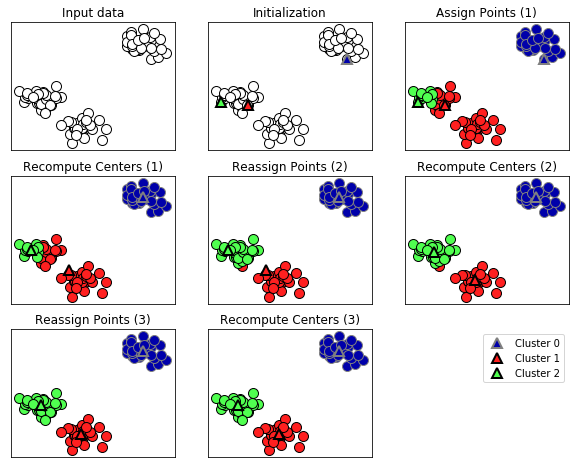

In [46]:
mglearn.plots.plot_kmeans_algorithm()

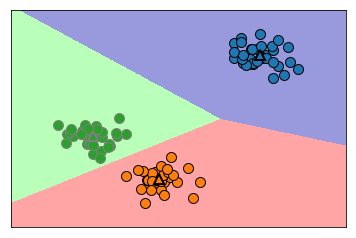

In [77]:
mglearn.plots.plot_kmeans_boundaries()

In [81]:
from sklearn.datasets import make_blobs
x, y = make_blobs() # 연습용 데이터셋
x.shape, y. shape


((100, 2), (100,))

In [82]:
from sklearn.cluster import KMeans

In [100]:
km = KMeans(n_clusters=3).fit(x) # x를 3개로 그룹화(cluster)

In [101]:
km.predict(x) # x 가 몇번째 그룹이니?

array([3, 3, 0, 0, 0, 3, 0, 0, 1, 3, 0, 1, 2, 2, 1, 0, 4, 3, 0, 3, 0, 3,
       2, 4, 3, 2, 3, 3, 3, 3, 2, 4, 3, 2, 4, 2, 3, 3, 3, 0, 4, 3, 1, 3,
       2, 4, 1, 3, 4, 2, 4, 0, 2, 1, 1, 4, 1, 4, 0, 3, 2, 4, 3, 2, 3, 1,
       0, 4, 2, 2, 3, 3, 1, 2, 2, 3, 2, 1, 1, 4, 1, 3, 4, 2, 1, 2, 1, 1,
       4, 2, 1, 2, 2, 0, 3, 0, 0, 2, 1, 2])

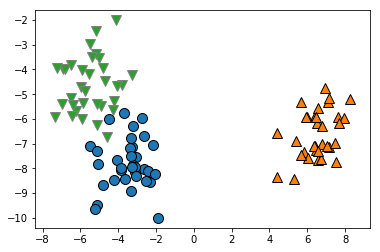

In [102]:
l = mglearn.discrete_scatter(x[:,0],x[:,1],y) #진짜

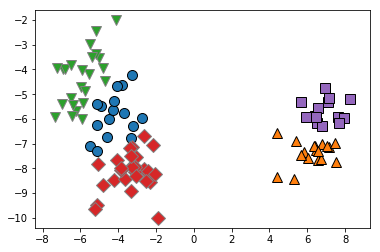

In [103]:
l = mglearn.discrete_scatter(x[:,0],x[:,1],km.predict(x)) #예측

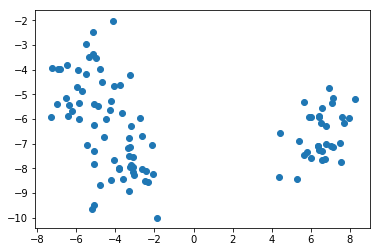

In [115]:
l = plt.scatter(x[:,0],x[:,1])

digits 에 적용해보세요
 - t-SNE 로 2개의 차원으로 축소합니다
 - 그 데이터로 k-Means 를 fit 합니다. k=10
 - k-Means의 예측을 산점도에서 표시합니다.

In [109]:
from sklearn.manifold import TSNE
digits_tsne = TSNE().fit_transform(digits.data)

In [111]:
km = KMeans(n_clusters=10).fit(digits_tsne)

In [112]:
predict_group = km.predict(digits_tsne)

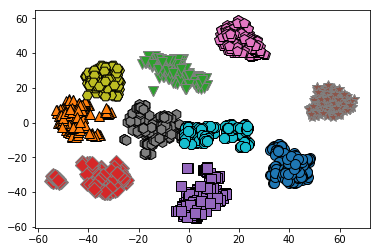

In [114]:
l = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], predict_group)

머신러닝 저장소 - 3위 와인데이터
와인의 질, 컬러, 알콜 도수 등을 측정 -> 원산지 (3군데) 를 추정하는 문제


한국 프로야구 10개팀 클러스터링

In [134]:
import pandas as pd
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
len(tables)

7

In [135]:
for t in tables:
    print(t.shape)

(10, 10)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


In [136]:
baseball = tables[0]

In [137]:
#baseball.set_index('팀명',inplace=True)
base = baseball.set_index('팀명')

In [138]:
base

,순위,승,무,패,승률,게임차,득점,실점,연속
팀명,,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342,2패
두산,2,54,0,36,0.600,6.0,440,346,2승
Hero,3,54,0,37,0.593,6.5,500,387,4승
LG,4,49,1,38,0.563,9.5,377,377,1패
NC,5,42,1,44,0.488,16.0,409,415,2패
KT,6,42,1,47,0.472,17.5,407,456,1패
삼성,7,37,1,49,0.430,21.0,400,424,2승
KIA,8,36,1,52,0.409,23.0,401,467,2패
한화,9,34,0,53,0.391,24.5,388,449,1승


In [140]:
base.dtypes

순위       int64
승        int64
무        int64
패        int64
승률     float64
게임차    float64
득점       int64
실점       int64
연속      object
dtype: object

In [144]:
data=base.drop(columns='연속')
data

,순위,승,무,패,승률,게임차,득점,실점
팀명,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342
두산,2,54,0,36,0.600,6.0,440,346
Hero,3,54,0,37,0.593,6.5,500,387
LG,4,49,1,38,0.563,9.5,377,377
NC,5,42,1,44,0.488,16.0,409,415
KT,6,42,1,47,0.472,17.5,407,456
삼성,7,37,1,49,0.430,21.0,400,424
KIA,8,36,1,52,0.409,23.0,401,467
한화,9,34,0,53,0.391,24.5,388,449


In [146]:
data.shape

(10, 8)

In [164]:
#2차원으로 변환한 후 k개로 클러스터링
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)
data_pca.shape

(10, 2)

In [177]:
# K-means로 클러스터링
km = KMeans(n_clusters=3).fit(data_pca)
group = km.predict(data_pca)

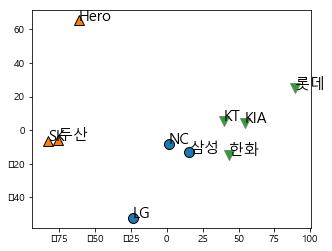

In [178]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5,4))
plt.xlim(data_pca[:,0].min(), data_pca[:,0].max()+1)
plt.xlim(data_pca[:,1].min(), data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i], fontdict= {'size':15} )
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1],group)

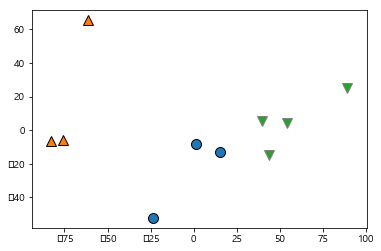

In [179]:
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], km.predict(data_pca))

In [210]:
wine = pd.read_csv('wine.data')
len(tables)
wine.dtypes

1          int64
14.23    float64
1.71     float64
2.43     float64
15.6     float64
127        int64
2.8      float64
3.06     float64
.28      float64
2.29     float64
5.64     float64
1.04     float64
3.92     float64
1065       int64
dtype: object

In [189]:
x = wine.iloc[:,1:]
pca = PCA(n_components=2).fit(x)
wine_pca = pca.transform(x)
wine_pca.shape


(177, 2)

In [190]:
km = KMeans(n_clusters=3).fit(wine_pca)
group = km.predict(wine_pca)

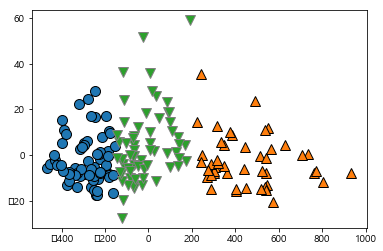

In [191]:
l = mglearn.discrete_scatter(wine_pca[:,0], wine_pca[:,1], km.predict(wine_pca))

In [221]:
loans = pd.read_csv('loans.csv')

In [225]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [226]:
loans = loans.dropna()
loans_hot = pd.get_dummies(loans)
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

#### 대출 상환 여부
1. get_dummy()로 purpose 원핫 인코딩
1. PCA 로 2차원으로 축소
1. K-Meanes(2개)로 그룹화
1. 산점도로 출력

In [214]:
loans.dtypes


credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [207]:
pca = PCA(n_components=2).fit(loans_hot)
x_pca = pca.transform(loans_hot) #주성분 2개 추출
km = KMeans(n_clusters=2).fit(x_pca) # 2개로 그룹화
group = km.predict(x_pca)

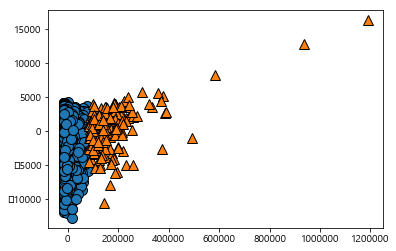

In [208]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], group)

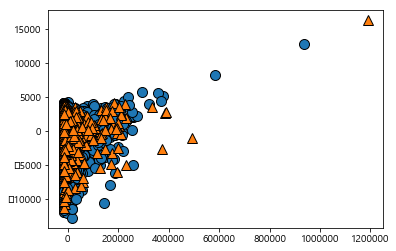

In [209]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], loans.iloc[:,-1])

교사학습 -X / Y
비교사학습 - X 차원축소, 클러스트링